In [182]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import loompy as lp

In [185]:
import scipy
from scipy.sparse import vstack

In [135]:
data_dir = '/home/ggorin/count_data/city_of_hope/'
filtered_data_dir = '/home/ggorin/count_data/city_of_hope/filtered_data/'
meta_dir = '/home/ggorin/count_data/city_of_hope/meta/'
# meta_file = meta_dir+'PSCA_17483_metadata.xlsx'
meta_file = meta_dir + 'IRB17483_metadata.csv'

P,Q,R,S, M, N, O IDs need to have `PSCA_` to match the data.

In [89]:
lib_names = ['UPN375_388_PSCA_PB_S_X5SCR_SE8003_SA157968',
'UPN375_376_388_393_PSCA_CART_X5SCR_SE6080_SA58165',
'UPN375_388_PSCA_PB_N_X5SCR_SE8003_SA157963',
'UPN375_388_PSCA_PB_O_X5SCR_SE8003_SA157964',
'UPN388_394_PSCA_PB_M_X5SCR_SE8003_SA157962',
'UPN388_394_PSCA_PB_P_X5SCR_SE8003_SA157965',
'UPN375_394_PSCA_PB_R_X5SCR_SE8003_SA157967',
'UPN388_394_PSCA_PB_Q_X5SCR_SE8003_SA157966',
'UPN375_403_406_PB_G_X5SCR_SE6436_SA71767',
'UPN388_406_PB_I_X5SCR_SE6438_SA71770',
'UPN375_403_406_PB_H_X5SCR_SE6437_SA71768',
'UPN393_403_406_PB_D_X5SCR_SE6452_SA71980',
'UPN375_376_393_PB_A_X5SCR_SE6452_SA71977',
'UPN376_388_403_PB_C_X5SCR_SE6452_SA71979',
'UPN394_531_555_CART_L_X5SCR_SE7662_SA134623',
'UPN375_388_393_PB_B_X5SCR_SE6452_SA71978',
'UPN376_388_406_PB_E_X5SCR_SE6452_SA71981',
'UPN454_455_504_CART_K_X5SCR_SE7661_SA134622',
'UPN376_393_406_PB_F_X5SCR_SE6435_SA71769',]
lib_dict = {}
for x in lib_names:
    y = x.rsplit('_',2)
    lib_dict[ '_'.join((y[1],y[2]))] = x

In [62]:
# lib_dict

In [65]:
df_meta = pd.read_csv(meta_file)

In [66]:
df_meta = df_meta[(df_meta['sequencing_platform']=='NovaSeqS4') & (df_meta['tissue_type']=='PB')]
df_meta['timepoint'] = df_meta['timepoint'].astype(int)

In [67]:
df_meta = df_meta.sort_values(['upn','timepoint'])

In [68]:
df_meta

,upn,timepoint,tissue_type,sample_name,library_id,flowcell_id,sequencing_platform,library_type
24,375,0,PB,PB_A,SE6452_SA71977,HJNN2DSXY,NovaSeqS4,X5SCR
103,375,0,PB,PB_S,SE8003_SA157968,H72NVDSX5,NovaSeqS4,X5SCR
30,375,1,PB,PB_B,SE6452_SA71978,HJNN2DSXY,NovaSeqS4,X5SCR
60,375,14,PB,PB_G,SE6436_SA71767,HKNHWDSXY,NovaSeqS4,X5SCR
82,375,14,PB,PB_N,SE8003_SA157963,H72NVDSX5,NovaSeqS4,X5SCR
66,375,28,PB,PB_H,SE6437_SA71768,HJNN3DSXY,NovaSeqS4,X5SCR
86,375,28,PB,PB_O,SE8003_SA157964,H72NVDSX5,NovaSeqS4,X5SCR
98,375,90,PB,PB_R,SE8003_SA157967,H72NVDSX5,NovaSeqS4,X5SCR
36,376,0,PB,PB_C,SE6452_SA71979,HJNN2DSXY,NovaSeqS4,X5SCR
25,376,1,PB,PB_A,SE6452_SA71977,HJNN2DSXY,NovaSeqS4,X5SCR


Best donors: 388, 375, 394

In [63]:
donor_ids = [388]

In [183]:
spliced_layer = 'spliced'
unspliced_layer = 'unspliced'
gene_attr = 'gene_name'
cell_attr = 'barcode'


In [214]:
layer_names = [unspliced_layer, spliced_layer]

In [192]:

meta_ = []
for donor in donor_ids:
    meta_donor = [donor]
    print(f'Donor: {donor}')
    df_donor = df_meta[df_meta['upn']==donor]
    t_points = df_donor['timepoint'].unique()
    for t in t_points:
        meta_donor.append(t)
        print(f'\tTime point: {t}')
        df_t = df_donor[df_donor['timepoint'] == t]
        for k,lib in enumerate(df_t['library_id']):
            df_lib = pd.read_csv(meta_dir + lib_dict[lib]+'_donor_ids.csv') 
            cf = df_lib['donor_id']==str(donor)
            bcs_ref = df_lib['cell_barcode'][cf]
            ad = sc.read_h5ad(data_dir + lib_dict[lib] + '/counts_unfiltered/adata.h5ad',backed='r')
            cf_adata = ad.obs_names.isin(bcs_ref)
            print(f'\t\tLibrary: {lib_dict[lib]}; {sum(cf)} cells in assignment, {sum(cf_adata)} cells in h5ad.')

            if k==0:
                S = ad[cf_adata].layers['spliced']
                U = ad[cf_adata].layers['unspliced']
                gn = np.asarray(ad.var_names)
                bcs = np.asarray(ad[cf_adata].obs_names)
            else:
                S = vstack((S,ad[cf_adata].layers['spliced']))
                U = vstack((U,ad[cf_adata].layers['unspliced']))
                if not np.all(gn==np.asarray(ad.var_names)):
                    raise ValueError('Gene names don''t match!')
                bcs = np.concatenate((bcs,np.asarray(ad[cf_adata].obs_names)))
        print(f'\t\tTotal barcodes: {len(bcs)}.')
        lp.create(filtered_data_dir+f'upn{donor}_t{t}.loom',\
            layers={'':scipy.sparse.csr_matrix(S.T.shape),
                    spliced_layer:S.T,
                    unspliced_layer:U.T},\
                    row_attrs={gene_attr:gn},\
                    col_attrs={cell_attr:bcs})
    meta_.append(meta_donor)

Donor: 388
	Time point: -6
		Library: UPN388_394_PSCA_PB_M_X5SCR_SE8003_SA157962; 14 cells in assignment, 14 cells in h5ad.
		Total barcodes: 14.
	Time point: 0
		Library: UPN376_388_406_PB_E_X5SCR_SE6452_SA71981; 28 cells in assignment, 28 cells in h5ad.
		Library: UPN375_388_PSCA_PB_S_X5SCR_SE8003_SA157968; 1934 cells in assignment, 1934 cells in h5ad.
		Total barcodes: 1962.
	Time point: 1
		Library: UPN388_406_PB_I_X5SCR_SE6438_SA71770; 268 cells in assignment, 268 cells in h5ad.
		Total barcodes: 268.
	Time point: 14
		Library: UPN375_388_393_PB_B_X5SCR_SE6452_SA71978; 865 cells in assignment, 865 cells in h5ad.
		Library: UPN375_388_PSCA_PB_O_X5SCR_SE8003_SA157964; 3937 cells in assignment, 3937 cells in h5ad.
		Total barcodes: 4802.
	Time point: 28
		Library: UPN376_388_403_PB_C_X5SCR_SE6452_SA71979; 1387 cells in assignment, 1387 cells in h5ad.
		Library: UPN388_394_PSCA_PB_P_X5SCR_SE8003_SA157965; 2690 cells in assignment, 2690 cells in h5ad.
		Total barcodes: 4077.
	Time poin

In [200]:
with open(filtered_data_dir+'basic_meta.txt','w') as f:
    for k in meta_:
        f.write(' '.join([str(_) for _ in k]))

Load basic info back in.

In [209]:
with open(filtered_data_dir+'basic_meta.txt','r') as f:
    dataset_t = f.read()
dataset_t = np.asarray(dataset_t.split()).astype(int)
donor_ind = dataset_t[0]
dataset_t = dataset_t[1:]

In [217]:
all_data = []
for t in dataset_t:
    filename = filtered_data_dir + f'upn{donor_ind}_t{t}.loom'
#     print(filename)
    with lp.connect(filename, mode="r") as ds:
        layers = [ds.layers[layer][:][:, :] for layer in layer_names]
        gene_names = ds.ra[gene_attr]
    layers = np.asarray(layers, dtype=int)
    all_data.append(layers)

In [239]:
filt_param={
    "min_U_mean": 0.01,
    "min_S_mean": 0.01,
    "max_U_max": 400,
    "max_S_max": 400,
    "min_U_max": 3,
    "min_S_max": 3,
}

In [240]:
filt_param

{'min_U_mean': 0.01,
 'min_S_mean': 0.01,
 'max_U_max': 400,
 'max_S_max': 400,
 'min_U_max': 3,
 'min_S_max': 3}

In [242]:
gf = []
for d in all_data:
    U_mean = d[0].mean(1)
    S_mean = d[1].mean(1)
    U_max = d[0].max(1)
    S_max = d[1].max(1)
    gf_ = (
        (U_mean > filt_param["min_U_mean"])
        & (S_mean > filt_param["min_S_mean"])
        & (U_max < filt_param["max_U_max"])
        & (S_max < filt_param["max_S_max"])
        & (U_max > filt_param["min_U_max"])
        & (S_max > filt_param["min_S_max"])
    )
    gf.append(gf_)
gf = np.asarray(gf)

In [245]:
gf.sum(1)

array([   0, 1034, 3577, 1052, 2157, 1124,  118])

In [248]:
exp_fractions = gf.mean(0)

In [252]:
n_selected = 500

In [262]:
q = np.quantile(exp_fractions, 1 - n_selected / len(exp_fractions))
selected_genes_filter = np.zeros(exp_fractions.shape, dtype=bool)
selected_genes_filter[exp_fractions > q] = True
np.random.seed(2813308004)
random_genes = np.where(exp_fractions == q)[0]
random_genes_sel = np.random.choice(
    random_genes, n_selected - selected_genes_filter.sum(), replace=False
)
selected_genes_filter[random_genes_sel] = True
gn_selected = gn[selected_genes_filter]

In [270]:
# gf = []
filt_data = []
for d in all_data:
    filt_data.append(d[:,selected_genes_filter,:])

In [404]:
means = []
var = []
fanom1 = []
cv2 = []
corrs = []
for d in filt_data:
    means.append(d.mean(2))
    var.append(d.var(2))
    fanom1.append(d.var(2)/d.mean(2)-1)
    cv2.append(d.var(2)/d.mean(2)**2)
    corrs.append([np.corrcoef(d[0,j],d[1,j])[0][1] for j in range(n_selected)])
means,var,fanom1,cv2 = (np.asarray(x) for x in (means,var,fanom1,cv2))

/tmp/ipykernel_2856712/3473531523.py:9: RuntimeWarning: invalid value encountered in divide
  fanom1.append(d.var(2)/d.mean(2)-1)
/tmp/ipykernel_2856712/3473531523.py:10: RuntimeWarning: invalid value encountered in divide
  cv2.append(d.var(2)/d.mean(2)**2)
/home/ggorin/miniconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/ggorin/miniconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [407]:
# d

In [302]:
means.shape

(7, 2, 500)

In [300]:
nT = len(dataset_t)

Text(99.50828125, 0.5, 'Spliced var-mean')

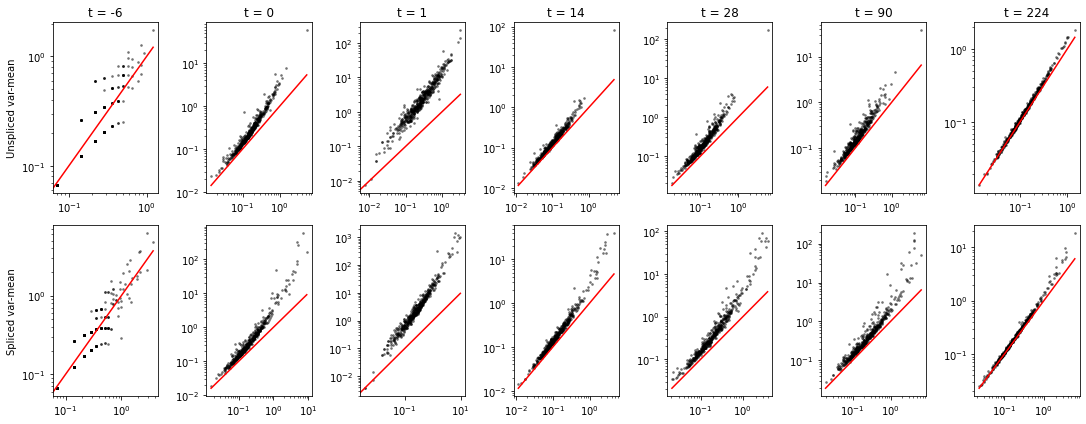

In [310]:
fig1,ax1 = plt.subplots(2,7,figsize=(15,6))
for i in range(2):
    for k in range(nT):
        ax1[i,k].scatter(means[k,i,:],var[k,i,:],3,'k',alpha=0.4)
        xl = [min(means[k,i,:]),max(means[k,i,:])]
        ax1[i,k].plot(xl,xl,'r-')
        ax1[i,k].set_xscale('log')
        ax1[i,k].set_yscale('log')
        ax1[0,k].set_title(f't = {dataset_t[k]}')
fig1.tight_layout()
ax1[0,0].set_ylabel('Unspliced var-mean')
ax1[1,0].set_ylabel('Spliced var-mean')

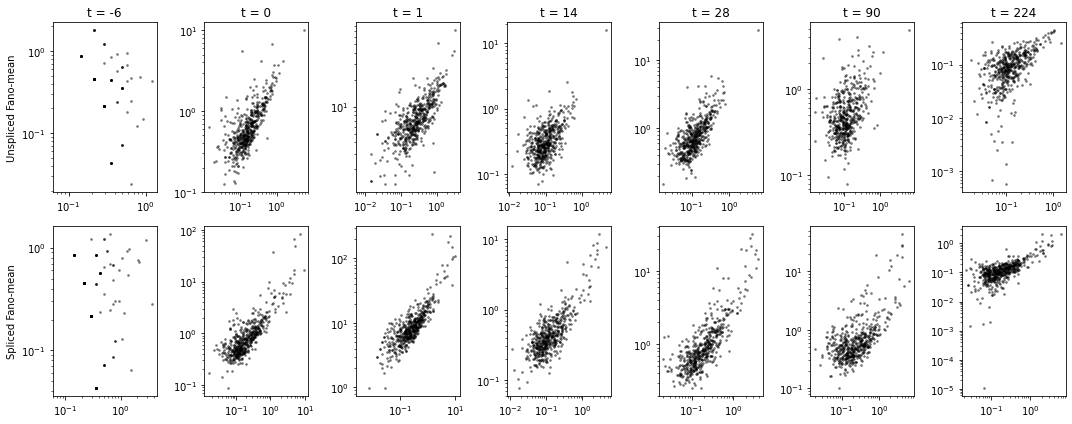

In [315]:
fig1,ax1 = plt.subplots(2,7,figsize=(15,6))
for i in range(2):
    for k in range(nT):
        ax1[i,k].scatter(means[k,i,:],fanom1[k,i,:],3,'k',alpha=0.4)
        xl = [min(means[k,i,:]),max(means[k,i,:])]
#         ax1[i,k].plot(xl,xl,'r-')
        ax1[i,k].set_xscale('log')
        ax1[i,k].set_yscale('log')
        ax1[0,k].set_title(f't = {dataset_t[k]}')
ax1[0,0].set_ylabel('Unspliced Fano-mean')
ax1[1,0].set_ylabel('Spliced Fano-mean')
fig1.tight_layout()


Text(0.5, 0, 'Time since treatment')

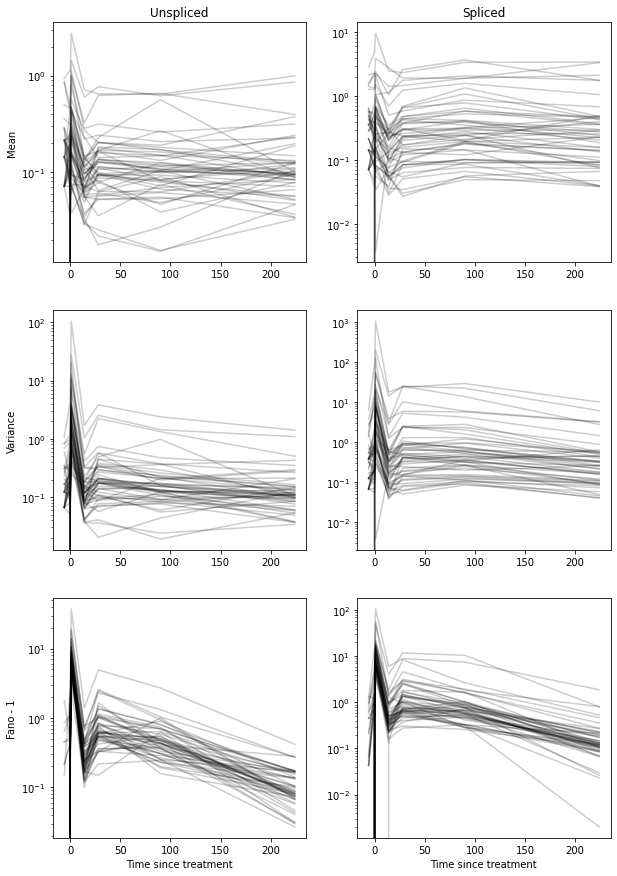

In [309]:
fig1,ax1 = plt.subplots(3,2,figsize=(10,15))
for i in range(2):
    ax1[0,i].plot(dataset_t,means[:,i,:50],color='k',alpha=0.2)
    ax1[0,i].set_yscale('log')
for i in range(2):
    ax1[1,i].plot(dataset_t,var[:,i,:50],color='k',alpha=0.2)
    ax1[1,i].set_yscale('log')
for i in range(2):
    ax1[2,i].plot(dataset_t,fanom1[:,i,:50],color='k',alpha=0.2)
    ax1[2,i].set_yscale('log')
    
ax1[0,0].set_title('Unspliced')
ax1[0,1].set_title('Spliced')
ax1[0,0].set_ylabel('Mean')
ax1[1,0].set_ylabel('Variance')
ax1[2,0].set_ylabel('Fano - 1')
ax1[2,0].set_xlabel('Time since treatment')
ax1[2,1].set_xlabel('Time since treatment')

In [316]:
dataset_t

array([ -6,   0,   1,  14,  28,  90, 224])

Text(0.5, 0, 'Time since treatment')

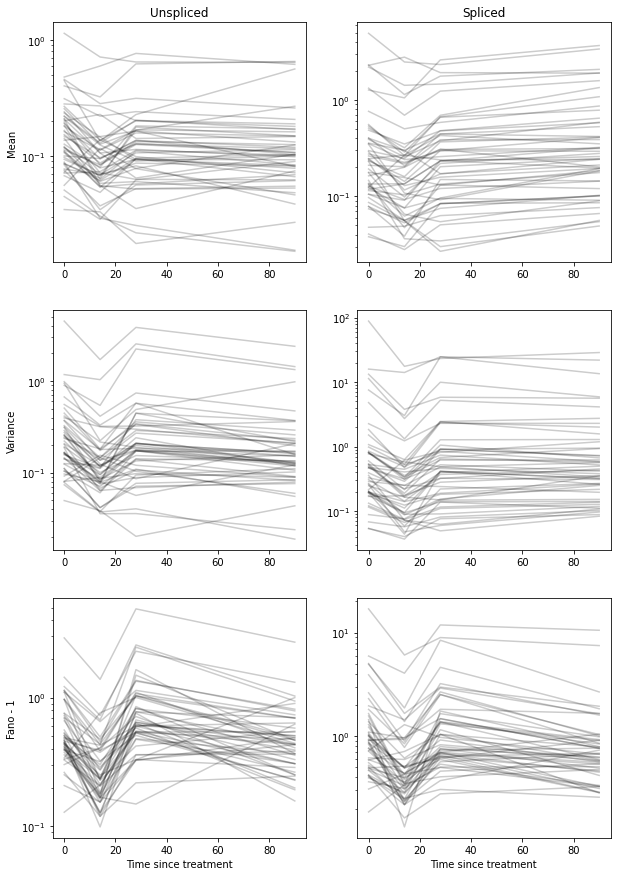

In [317]:
tf = [1,3,4,5]
fig1,ax1 = plt.subplots(3,2,figsize=(10,15))
for i in range(2):
    ax1[0,i].plot(dataset_t[tf],means[tf,i,:50],color='k',alpha=0.2)
    ax1[0,i].set_yscale('log')
for i in range(2):
    ax1[1,i].plot(dataset_t[tf],var[tf,i,:50],color='k',alpha=0.2)
    ax1[1,i].set_yscale('log')
for i in range(2):
    ax1[2,i].plot(dataset_t[tf],fanom1[tf,i,:50],color='k',alpha=0.2)
    ax1[2,i].set_yscale('log')
    
ax1[0,0].set_title('Unspliced')
ax1[0,1].set_title('Spliced')
ax1[0,0].set_ylabel('Mean')
ax1[1,0].set_ylabel('Variance')
ax1[2,0].set_ylabel('Fano - 1')
ax1[2,0].set_xlabel('Time since treatment')
ax1[2,1].set_xlabel('Time since treatment')

In [388]:
b = fanom1[:,0,:]
beta = b/means[:,0,:]
gamma = b/means[:,1,:]


/tmp/ipykernel_2856712/3747180234.py:3: RuntimeWarning: divide by zero encountered in divide
  gamma = b/means[:,1,:]


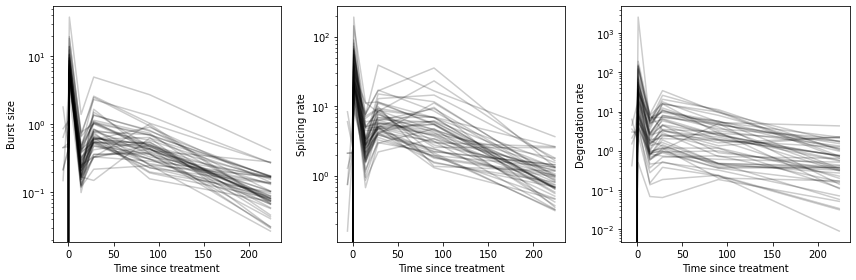

In [389]:
# tf = [1,3,4,5]
tf = range(nT)
fig1,ax1 = plt.subplots(1,3,figsize=(12,4))
ax1[0].plot(dataset_t[tf],b[tf,:50],color='k',alpha=0.2)
ax1[0].set_yscale('log')
ax1[1].plot(dataset_t[tf],beta[tf,:50],color='k',alpha=0.2)
ax1[1].set_yscale('log')
ax1[2].plot(dataset_t[tf],gamma[tf,:50],color='k',alpha=0.2)
ax1[2].set_yscale('log')
    
# ax1[0,0].set_title('Unspliced')
# ax1[0,1].set_title('Spliced')
ax1[0].set_ylabel('Burst size')
ax1[1].set_ylabel('Splicing rate')
ax1[2].set_ylabel('Degradation rate')
for k in range(3):
    ax1[k].set_xlabel('Time since treatment')
fig1.tight_layout()

Mean evolution

In [393]:
tf = range(1,nT)


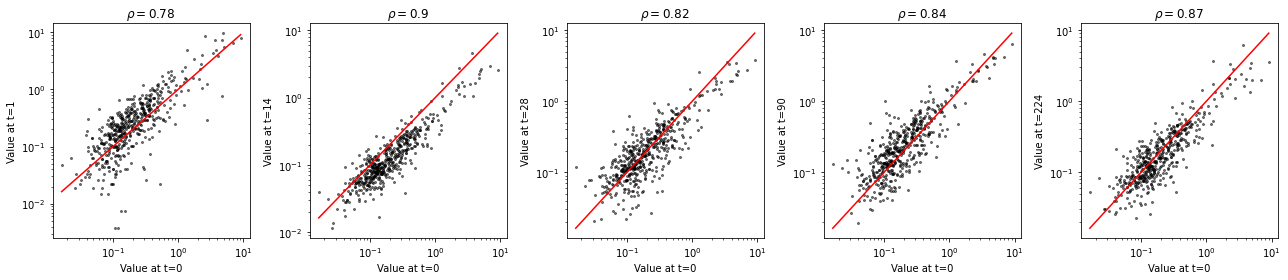

In [394]:
fig1,ax1 = plt.subplots(1,len(tf)-1,figsize=(18,4))
baseline = means[tf[0],1,:]
gf_ = (baseline>0) & (np.isfinite(baseline))

for k,tf_ in enumerate(tf[1:]):
    val_later = means[tf_,1,:]
    
    gf = gf_ & (val_later>0) & (np.isfinite(val_later))
    x = baseline[gf]
    y = val_later[gf]
    rho = np.corrcoef(np.log10(x),np.log10(y))[0][1].round(2)
    ax1[k].scatter(x,y,4,'k',alpha=0.5)
    xl = [min(baseline[gf]),max(baseline[gf])]
    ax1[k].plot(xl,xl,'r-')
    ax1[k].set_xlabel(f'Value at t={dataset_t[tf[0]]}')
    ax1[k].set_ylabel(f'Value at t={dataset_t[tf_]}')
    ax1[k].set_title(r'$\rho = $'+f'{rho}')
    ax1[k].set_xscale('log')
    ax1[k].set_yscale('log')

fig1.tight_layout()

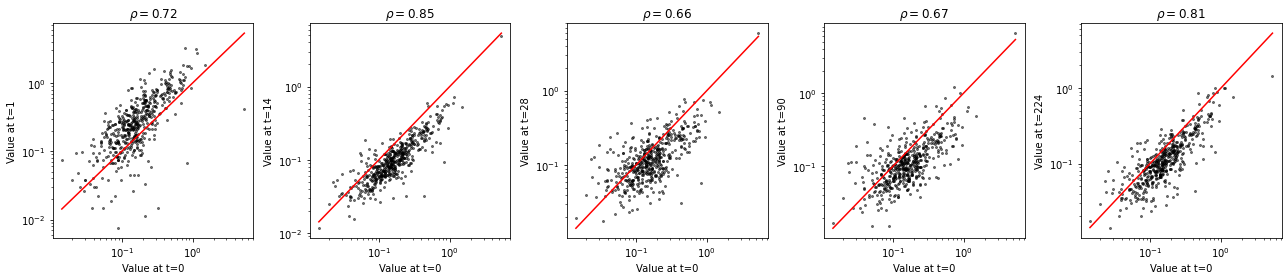

In [395]:
fig1,ax1 = plt.subplots(1,len(tf)-1,figsize=(18,4))
baseline = means[tf[0],0,:]
gf_ = (baseline>0) & (np.isfinite(baseline))

for k,tf_ in enumerate(tf[1:]):
    val_later = means[tf_,0,:]
    
    gf = gf_ & (val_later>0) & (np.isfinite(val_later))
    x = baseline[gf]
    y = val_later[gf]
    rho = np.corrcoef(np.log10(x),np.log10(y))[0][1].round(2)
    ax1[k].scatter(x,y,4,'k',alpha=0.5)
    xl = [min(baseline[gf]),max(baseline[gf])]
    ax1[k].plot(xl,xl,'r-')
    ax1[k].set_xlabel(f'Value at t={dataset_t[tf[0]]}')
    ax1[k].set_ylabel(f'Value at t={dataset_t[tf_]}')
    ax1[k].set_title(r'$\rho = $'+f'{rho}')
    ax1[k].set_xscale('log')
    ax1[k].set_yscale('log')

fig1.tight_layout()

Var evolution

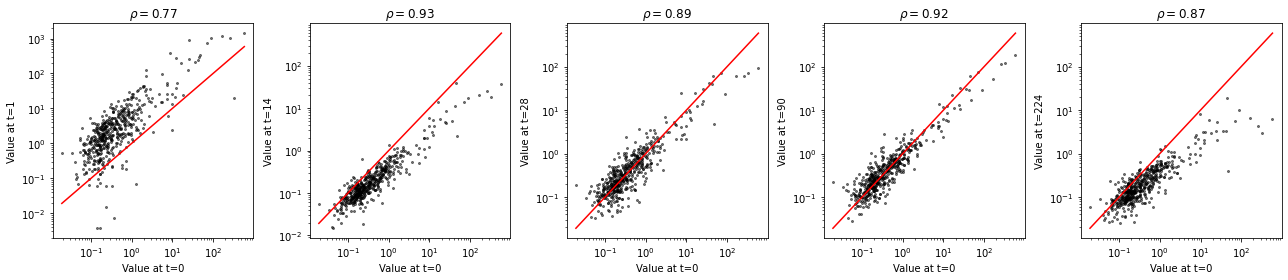

In [396]:
fig1,ax1 = plt.subplots(1,len(tf)-1,figsize=(18,4))
baseline = var[tf[0],1,:]
gf_ = (baseline>0) & (np.isfinite(baseline))

for k,tf_ in enumerate(tf[1:]):
    val_later = var[tf_,1,:]
    
    gf = gf_ & (val_later>0) & (np.isfinite(val_later))
    x = baseline[gf]
    y = val_later[gf]
    rho = np.corrcoef(np.log10(x),np.log10(y))[0][1].round(2)
    ax1[k].scatter(x,y,4,'k',alpha=0.5)
    xl = [min(baseline[gf]),max(baseline[gf])]
    ax1[k].plot(xl,xl,'r-')
    ax1[k].set_xlabel(f'Value at t={dataset_t[tf[0]]}')
    ax1[k].set_ylabel(f'Value at t={dataset_t[tf_]}')
    ax1[k].set_title(r'$\rho = $'+f'{rho}')
    ax1[k].set_xscale('log')
    ax1[k].set_yscale('log')

fig1.tight_layout()

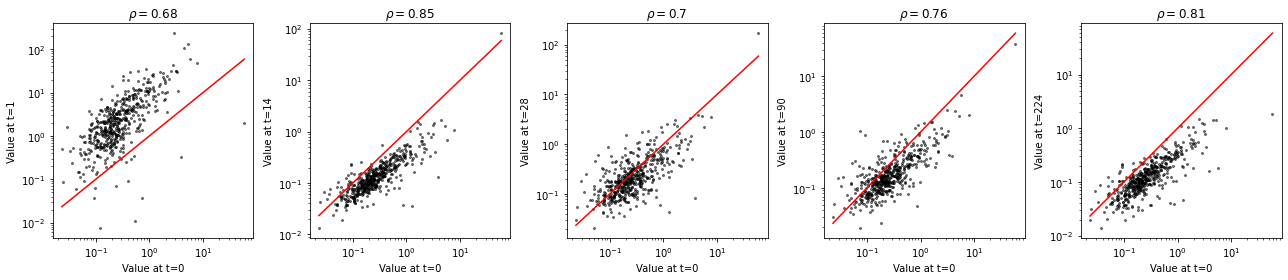

In [397]:
fig1,ax1 = plt.subplots(1,len(tf)-1,figsize=(18,4))
baseline = var[tf[0],0,:]
gf_ = (baseline>0) & (np.isfinite(baseline))

for k,tf_ in enumerate(tf[1:]):
    val_later = var[tf_,0,:]
    
    gf = gf_ & (val_later>0) & (np.isfinite(val_later))
    x = baseline[gf]
    y = val_later[gf]
    rho = np.corrcoef(np.log10(x),np.log10(y))[0][1].round(2)
    ax1[k].scatter(x,y,4,'k',alpha=0.5)
    xl = [min(baseline[gf]),max(baseline[gf])]
    ax1[k].plot(xl,xl,'r-')
    ax1[k].set_xlabel(f'Value at t={dataset_t[tf[0]]}')
    ax1[k].set_ylabel(f'Value at t={dataset_t[tf_]}')
    ax1[k].set_title(r'$\rho = $'+f'{rho}')
    ax1[k].set_xscale('log')
    ax1[k].set_yscale('log')

fig1.tight_layout()

cv2

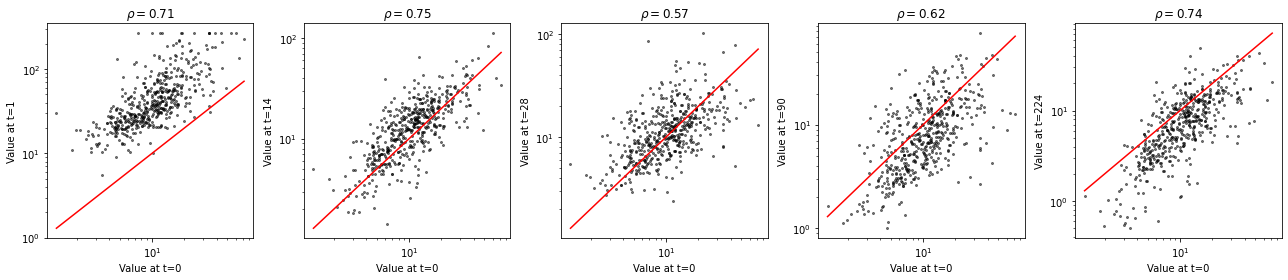

In [400]:
fig1,ax1 = plt.subplots(1,len(tf)-1,figsize=(18,4))
baseline = cv2[tf[0],1,:]
gf_ = (baseline>0) & (np.isfinite(baseline))

for k,tf_ in enumerate(tf[1:]):
    val_later = cv2[tf_,1,:]
    
    gf = gf_ & (val_later>0) & (np.isfinite(val_later))
    x = baseline[gf]
    y = val_later[gf]
    rho = np.corrcoef(np.log10(x),np.log10(y))[0][1].round(2)
    ax1[k].scatter(x,y,4,'k',alpha=0.5)
    xl = [min(baseline[gf]),max(baseline[gf])]
    ax1[k].plot(xl,xl,'r-')
    ax1[k].set_xlabel(f'Value at t={dataset_t[tf[0]]}')
    ax1[k].set_ylabel(f'Value at t={dataset_t[tf_]}')
    ax1[k].set_title(r'$\rho = $'+f'{rho}')
    ax1[k].set_xscale('log')
    ax1[k].set_yscale('log')

fig1.tight_layout()

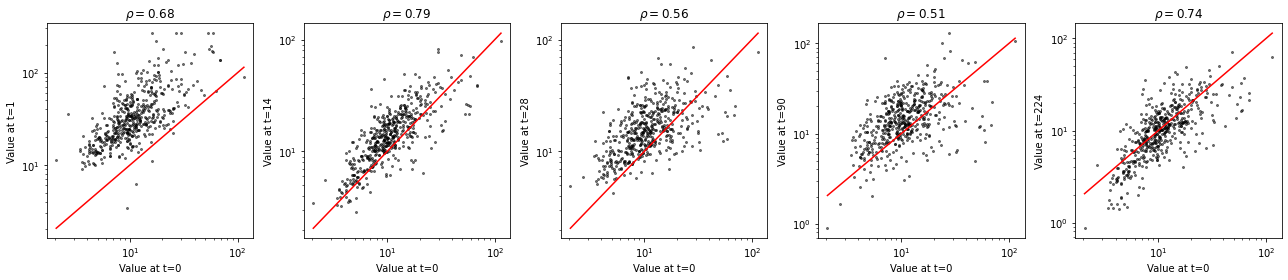

In [401]:
fig1,ax1 = plt.subplots(1,len(tf)-1,figsize=(18,4))
baseline = cv2[tf[0],0,:]
gf_ = (baseline>0) & (np.isfinite(baseline))

for k,tf_ in enumerate(tf[1:]):
    val_later = cv2[tf_,0,:]
    
    gf = gf_ & (val_later>0) & (np.isfinite(val_later))
    x = baseline[gf]
    y = val_later[gf]
    rho = np.corrcoef(np.log10(x),np.log10(y))[0][1].round(2)
    ax1[k].scatter(x,y,4,'k',alpha=0.5)
    xl = [min(baseline[gf]),max(baseline[gf])]
    ax1[k].plot(xl,xl,'r-')
    ax1[k].set_xlabel(f'Value at t={dataset_t[tf[0]]}')
    ax1[k].set_ylabel(f'Value at t={dataset_t[tf_]}')
    ax1[k].set_title(r'$\rho = $'+f'{rho}')
    ax1[k].set_xscale('log')
    ax1[k].set_yscale('log')

fig1.tight_layout()

Corrs

In [410]:
corrs = np.asarray(corrs)

In [411]:
corrs.shape

(7, 500)

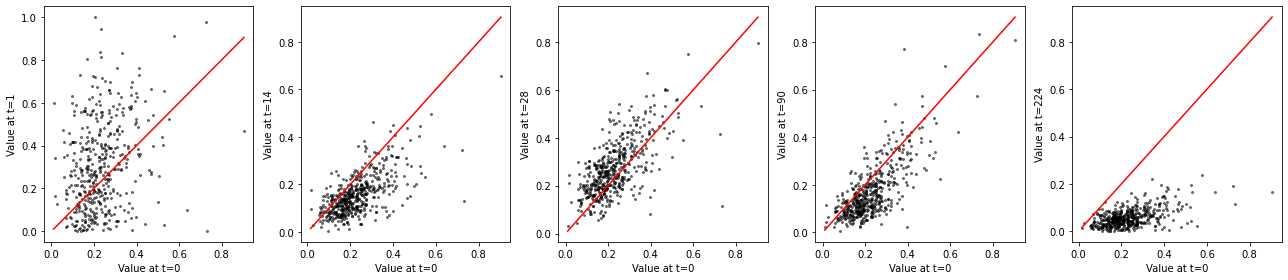

In [412]:
fig1,ax1 = plt.subplots(1,len(tf)-1,figsize=(18,4))
baseline = corrs[tf[0],:]
gf_ = (baseline>0) & (np.isfinite(baseline))

for k,tf_ in enumerate(tf[1:]):
    val_later = corrs[tf_,:]

    gf = gf_ & (val_later>0) & (np.isfinite(val_later))
    x = baseline[gf]
    y = val_later[gf]
#     rho = np.corrcoef(np.log10(x),np.log10(y))[0][1].round(2)
    ax1[k].scatter(x,y,4,'k',alpha=0.5)
    xl = [min(baseline[gf]),max(baseline[gf])]
    ax1[k].plot(xl,xl,'r-')
    ax1[k].set_xlabel(f'Value at t={dataset_t[tf[0]]}')
    ax1[k].set_ylabel(f'Value at t={dataset_t[tf_]}')
#     ax1[k].set_title(r'$\rho = $'+f'{rho}')
#     ax1[k].set_xscale('log')
#     ax1[k].set_yscale('log')

fig1.tight_layout()

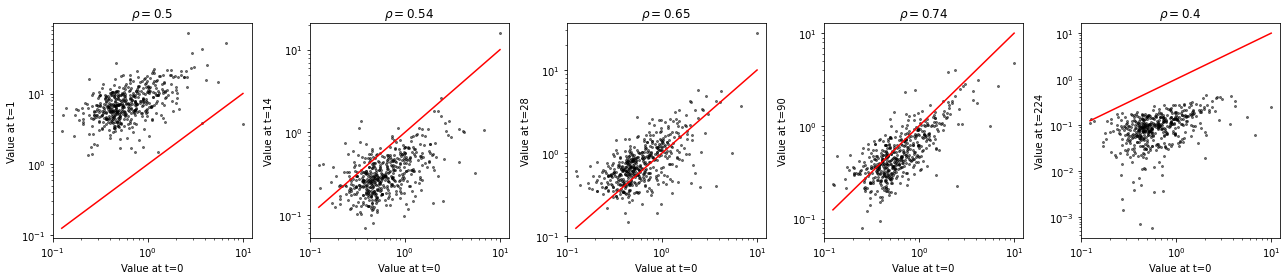

In [384]:
fig1,ax1 = plt.subplots(1,len(tf)-1,figsize=(18,4))
baseline = b[tf[0]]
gf_ = (baseline>0) & (np.isfinite(baseline))

for k,tf_ in enumerate(tf[1:]):
    val_later = b[tf_]
    
    gf = gf_ & (val_later>0) & (np.isfinite(val_later))
    x = baseline[gf]
    y = val_later[gf]
    rho = np.corrcoef(np.log10(x),np.log10(y))[0][1].round(2)
    ax1[k].scatter(x,y,4,'k',alpha=0.5)
    xl = [min(baseline[gf]),max(baseline[gf])]
    ax1[k].plot(xl,xl,'r-')
    ax1[k].set_xlabel(f'Value at t={dataset_t[tf[0]]}')
    ax1[k].set_ylabel(f'Value at t={dataset_t[tf_]}')
    ax1[k].set_title(r'$\rho = $'+f'{rho}')
    ax1[k].set_xscale('log')
    ax1[k].set_yscale('log')

fig1.tight_layout()

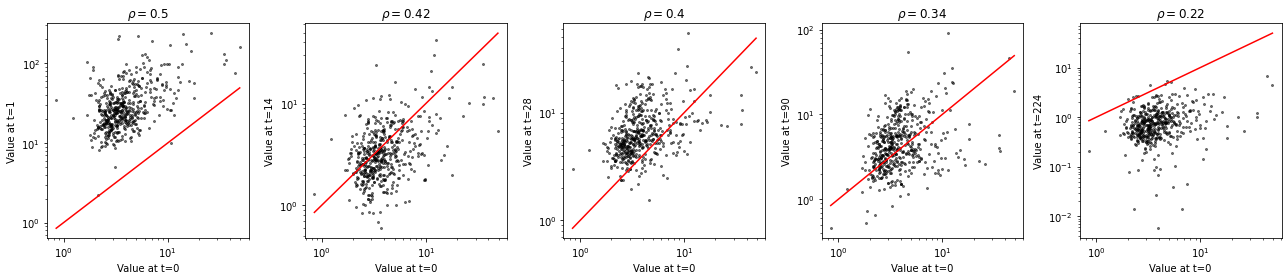

In [385]:
fig1,ax1 = plt.subplots(1,len(tf)-1,figsize=(18,4))
baseline = beta[tf[0]]
gf = (baseline>0) & (np.isfinite(baseline))

for k,tf_ in enumerate(tf[1:]):
    val_later = beta[tf_]
    
    gf = gf_ & (val_later>0) & (np.isfinite(val_later))
    x = baseline[gf]
    y = val_later[gf]
    rho = np.corrcoef(np.log10(x),np.log10(y))[0][1].round(2)
    ax1[k].scatter(x,y,4,'k',alpha=0.5)
    xl = [min(baseline[gf]),max(baseline[gf])]
    ax1[k].plot(xl,xl,'r-')
    ax1[k].set_xlabel(f'Value at t={dataset_t[tf[0]]}')
    ax1[k].set_ylabel(f'Value at t={dataset_t[tf_]}')
    ax1[k].set_title(r'$\rho = $'+f'{rho}')
    ax1[k].set_xscale('log')
    ax1[k].set_yscale('log')
# ax1[1].set_title('Splicing rate')
fig1.tight_layout()

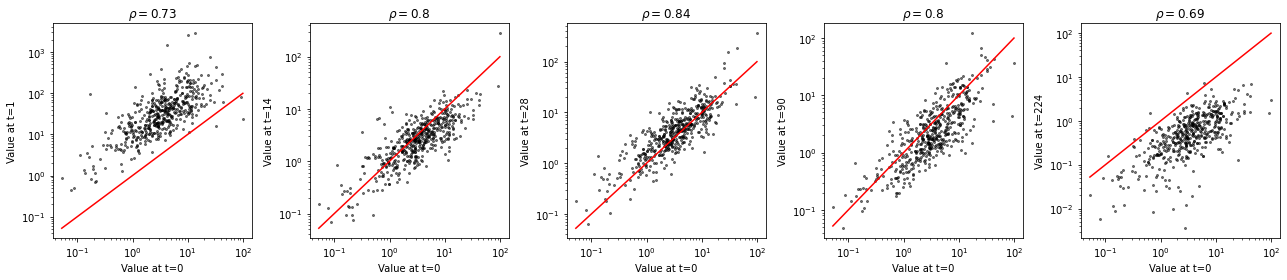

In [386]:
fig1,ax1 = plt.subplots(1,len(tf)-1,figsize=(18,4))
baseline = gamma[tf[0]]
gf = (baseline>0) & (np.isfinite(baseline))

for k,tf_ in enumerate(tf[1:]):
    val_later = gamma[tf_]
    
    gf = gf_ & (val_later>0) & (np.isfinite(val_later))
    x = baseline[gf]
    y = val_later[gf]
    rho = np.corrcoef(np.log10(x),np.log10(y))[0][1].round(2)
    ax1[k].scatter(x,y,4,'k',alpha=0.5)
    xl = [min(baseline[gf]),max(baseline[gf])]
    ax1[k].plot(xl,xl,'r-')
    ax1[k].set_xlabel(f'Value at t={dataset_t[tf[0]]}')
    ax1[k].set_ylabel(f'Value at t={dataset_t[tf_]}')
    ax1[k].set_title(r'$\rho = $'+f'{rho}')
    ax1[k].set_xscale('log')
    ax1[k].set_yscale('log')
# ax1[1].set_title('Degradation rate')
fig1.tight_layout()

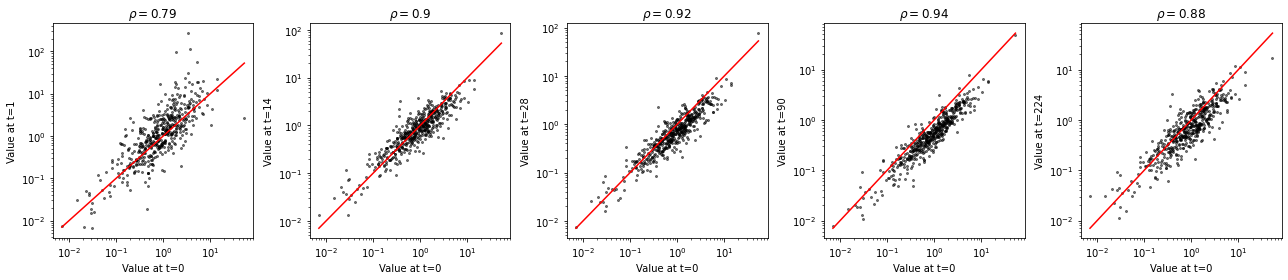

In [387]:
fig1,ax1 = plt.subplots(1,len(tf)-1,figsize=(18,4))
baseline = gamma[tf[0]]/beta[tf[0]]
gf = (baseline>0) & (np.isfinite(baseline))

for k,tf_ in enumerate(tf[1:]):
    val_later = gamma[tf_]/beta[tf_]
    
    gf = gf_ & (val_later>0) & (np.isfinite(val_later))
    x = baseline[gf]
    y = val_later[gf]
    rho = np.corrcoef(np.log10(x),np.log10(y))[0][1].round(2)
    ax1[k].scatter(x,y,4,'k',alpha=0.5)
    xl = [min(baseline[gf]),max(baseline[gf])]
    ax1[k].plot(xl,xl,'r-')
    ax1[k].set_xlabel(f'Value at t={dataset_t[tf[0]]}')
    ax1[k].set_ylabel(f'Value at t={dataset_t[tf_]}')
    ax1[k].set_title(r'$\rho = $'+f'{rho}')
    ax1[k].set_xscale('log')
    ax1[k].set_yscale('log')
# ax1[1].set_title('Ratio of splicing to deg rate')
fig1.tight_layout()

In [416]:
corrs.shape

(7, 500)

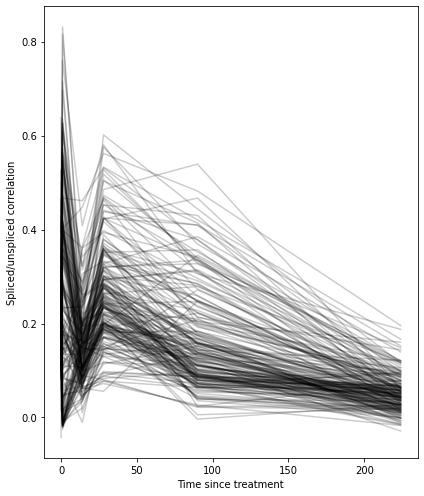

In [422]:
tf = range(1,nT)
fig1,ax1 = plt.subplots(1,1,figsize=(6,7))
ax1.plot(dataset_t[tf],corrs[tf,:200],color='k',alpha=0.2)
ax1.set_ylabel('Spliced/unspliced correlation')
ax1.set_xlabel('Time since treatment')
fig1.tight_layout()

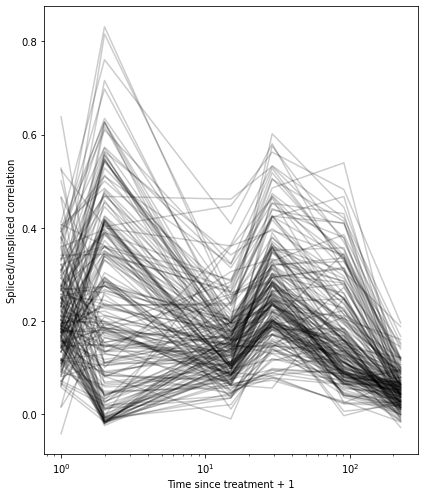

In [431]:
tf = range(1,nT)
fig1,ax1 = plt.subplots(1,1,figsize=(6,7))
ax1.plot(dataset_t[tf]+1,corrs[tf,:200],color='k',alpha=0.2)
ax1.set_ylabel('Spliced/unspliced correlation')
ax1.set_xlabel('Time since treatment + 1')
ax1.set_xscale('log')
fig1.tight_layout()

In [426]:
means.shape

(7, 2, 500)

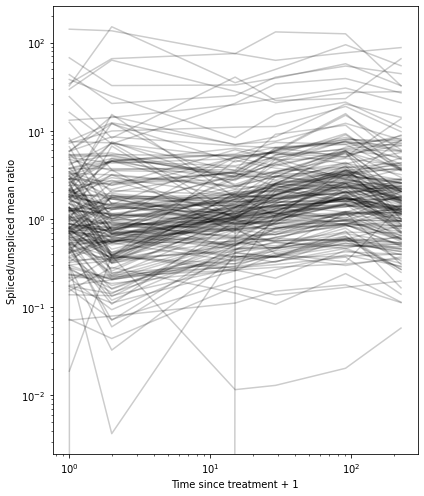

In [434]:
tf = range(1,nT)
fig1,ax1 = plt.subplots(1,1,figsize=(6,7))
ax1.plot(dataset_t[tf]+1,means[tf,1,:200]/means[tf,0,:200],color='k',alpha=0.2)
ax1.set_ylabel('Spliced/unspliced mean ratio')
ax1.set_xlabel('Time since treatment + 1')
ax1.set_yscale('log')
ax1.set_xscale('log')
fig1.tight_layout()